In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [7]:
def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:, :2]
    y = data[:, 2]
    return X, y

In [20]:
def plot_data(X, y, pos_label='y=1', neg_label='y=0'):
    positive = y == 1
    negative = y == 0

    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)

In [21]:
X_train, y_train = load_data('data.txt')

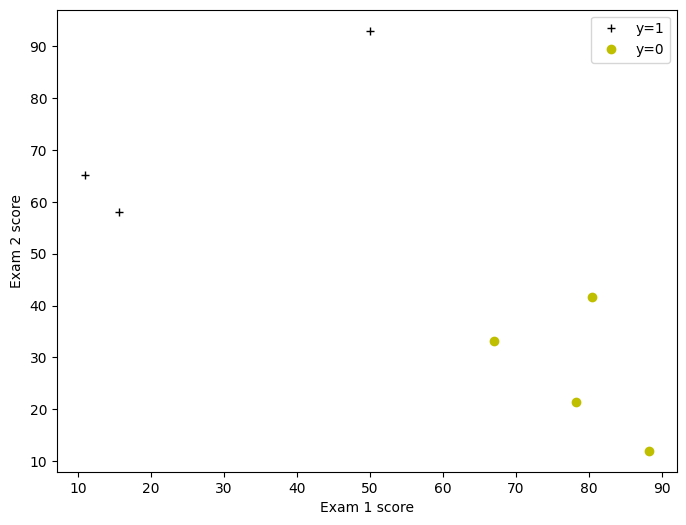

In [22]:
plt.figure(figsize=(8, 6))
plot_data(X_train, y_train)
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.legend(loc='upper right')
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()


In [25]:
model.fit(X_train, y_train)

LogisticRegression()

In [26]:
model.coef_

array([[-0.16083674,  0.1579194 ]])

In [27]:
model.intercept_

array([-0.3659446])

w0 + w1 * x1 + w2 * x2 = 0
y = k * x + b
x2 = -w1 * x1 / w2 - w0 / w2

In [28]:
def decision_boundary(model, x):
    w_0 = model.intercept_[0]
    w_1 = model.coef_[0][0]
    w_2 = model.coef_[0][1]

    return -w_1 * x / w_2 - w_0 / w_2

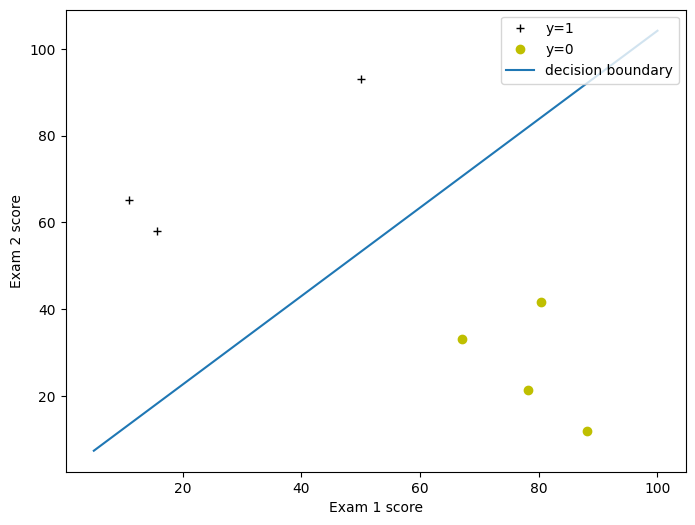

In [29]:
x = np.linspace(5, 100, 100)

plt.figure(figsize=(8, 6))
plot_data(X_train, y_train)
plt.plot(x, decision_boundary(model, x), label='decision boundary')
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.legend(loc='upper right')
plt.show()

In [31]:
x = np.linspace(5, 100, 100)
y = np.linspace(5, 100, 100).T
xx, yy = np.meshgrid(x, y)

X= np.c_[xx.ravel(), yy.ravel()]

probas = model.predict_proba(X)
pr = probas[:, 1].reshape((100, 100))

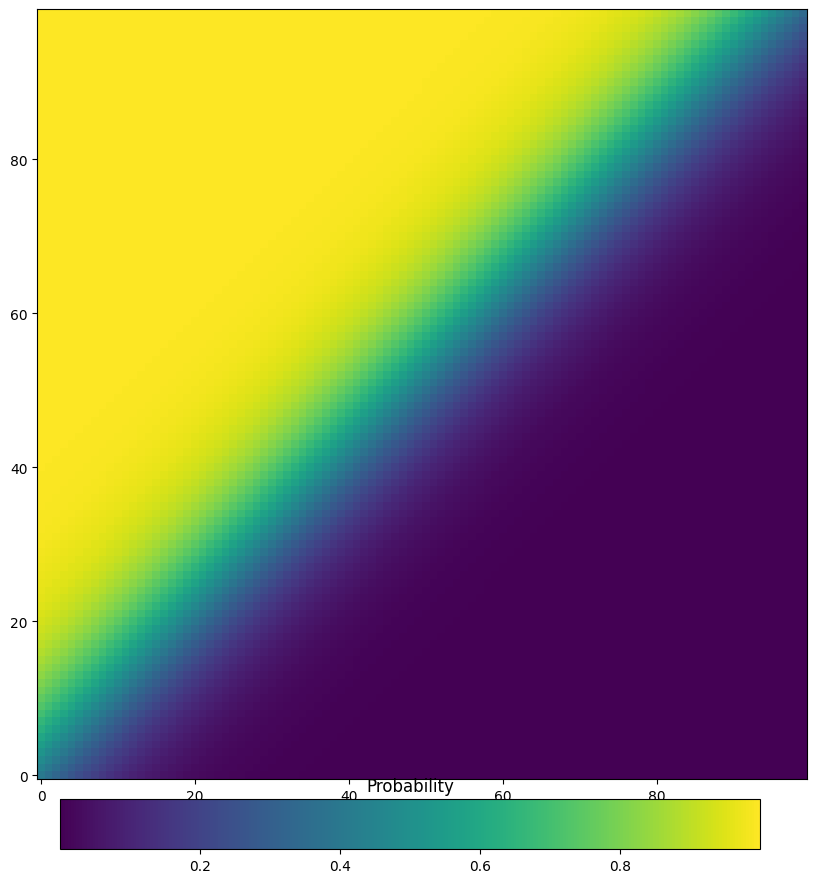

In [33]:
plt.figure(figsize= (10, 10))

imshow_handle = plt.imshow(pr, origin='lower')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title('Probability')
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')
plt.show()

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import RidgeClassifier
X, y = load_breast_cancer(return_X_y=True)

clf = RidgeClassifier(alpha=30.0).fit(X, y)
clf.score(X, y)

0.9543057996485061

In [5]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

X, y = load_iris(return_X_y=True)
clf = LogisticRegression(penalty="l1", solver="liblinear", random_state=0).fit(X, y)
clf.predict(X[:2, :])

clf.predict_proba(X[:2, :])

clf.score(X, y)

0.96